# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Data Collection and Analysis

In [2]:
# Read Data
Diabetes_data = pd.read_csv("E:\DATA\diabetes.csv")

In [3]:
Diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
Diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
Diabetes_mean= Diabetes_data.groupby("Outcome").mean()
Diabetes_min =Diabetes_data.groupby("Outcome").min()
Diabetes_max= Diabetes_data.groupby("Outcome").max()

In [6]:
Diabetes_mean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [7]:
Diabetes_min

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,0,0,0,0,0,0.0,0.078,21
1,0,0,0,0,0,0.0,0.088,21


In [8]:
Diabetes_max

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,13,197,122,60,744,57.3,2.329,81
1,17,199,114,99,846,67.1,2.420,70


In [9]:
Diabetes_data.value_counts("Outcome")

Outcome
0    500
1    268
dtype: int64

# Visualization 
Bar Plot

In [10]:
mean_age = Diabetes_data.groupby("Outcome")["Age"].max()

<BarContainer object of 2 artists>

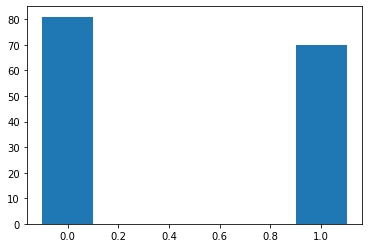

In [11]:
plt.bar(mean_age.index , mean_age.values ,width=0.2)

# separating the data and labels

In [12]:
X= Diabetes_data.drop(columns="Outcome" , axis=1)
y= Diabetes_data["Outcome"]

In [13]:
print(X)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


# Data Standardization

In [14]:
sscaler = StandardScaler()

In [15]:
sscaler.fit(X)

StandardScaler()

In [16]:
new_X= sscaler.transform(X)

In [17]:
new_X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [18]:
X= new_X
y= Diabetes_data["Outcome"]

In [19]:
print(X.shape , y.shape)

(768, 8) (768,)


## Train Test Split

In [20]:
x_train , x_test , y_train, y_test= train_test_split(X , y ,test_size=0.2 , random_state=42 , stratify=y)

In [21]:
print(X.shape , x_train.shape , x_test.shape)

(768, 8) (614, 8) (154, 8)


# SVM model

In [22]:
classifier= svm.SVC(kernel='linear')

In [23]:
classifier.fit(x_train,  y_train)

SVC(kernel='linear')

In [24]:
pred= classifier.predict(x_test)

**Model** Evaluation

In [25]:
acc= accuracy_score(pred , y_test)
print("Accuracy score of test data is= " , acc)

Accuracy score of test data is=  0.7207792207792207


# Making a Predictive System

In [27]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = sscaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic
